
# Gradient Descent on $(4x + 2y)^2$

We repeat the manual gradient-descent walk-through from the 1D example but now the
objective depends on two variables. The function is still quadratic, so we can
derive its gradient analytically and then apply gradient descent step-by-step.



## Visualizing $f(x, y)$

The quadratic bowl lives in three dimensions (two for the inputs and one for the
output). The next cell draws the surface so we can see how the landscape curves.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401  (needed for 3D projection)


def f(x: float, y: float) -> float:
    """Objective function f(x, y) = (4x + 2y)^2."""
    return (4 * x + 2 * y) ** 2


print('Objective function ready to plot.')


Objective function ready to plot.


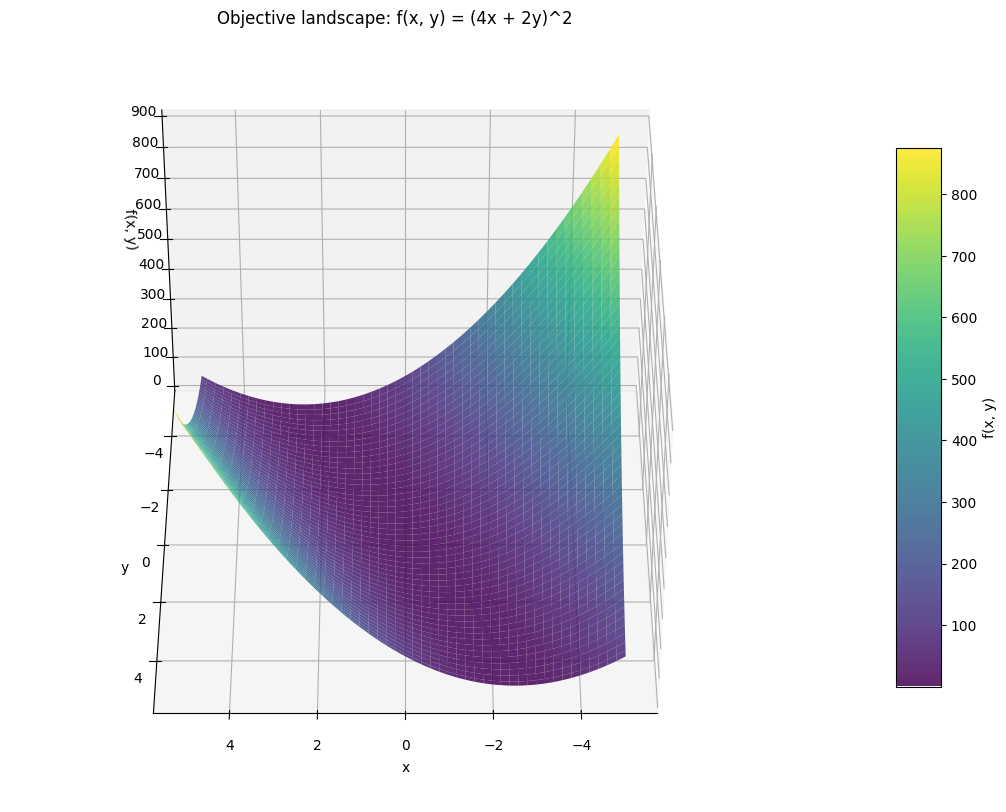

In [2]:

x_range = (-5.0, 5.0)
y_range = (-5.0, 5.0)

xs = np.linspace(*x_range, 150)
ys = np.linspace(*y_range, 150)
X, Y = np.meshgrid(xs, ys)
Z = f(X, Y)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.85, linewidth=0)
ax.set_title('Objective landscape: f(x, y) = (4x + 2y)^2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.view_init(elev=40, azim=90)
fig.colorbar(surface, shrink=0.7, aspect=12, pad=0.1, label='f(x, y)')
plt.show()



## Deriving the gradient and update rule

Start from the original function

$$f(x, y) = (4x + 2y)^2.$$

Treat the expression inside the square as the inner function $u(x, y) = 4x + 2y$ and
the outer function as $g(u) = u^2$, so $f(x, y) = g(u(x, y))$. The chain rule tells
us how to differentiate compositions:

$$\frac{\partial f}{\partial x} = g'(u) \cdot \frac{\partial u}{\partial x}, \qquad
  \frac{\partial f}{\partial y} = g'(u) \cdot \frac{\partial u}{\partial y}.$$

Compute every term explicitly:

$$g'(u) = 2u = 2(4x + 2y), \qquad \frac{\partial u}{\partial x} = 4, \qquad
  \frac{\partial u}{\partial y} = 2.$$

Multiply the factors to obtain each partial derivative:

$$\frac{\partial f}{\partial x} = 2(4x + 2y) \cdot 4 = 8(4x + 2y) = 32x + 16y,$$
$$\frac{\partial f}{\partial y} = 2(4x + 2y) \cdot 2 = 4(4x + 2y) = 16x + 8y.$$

Collecting the two partials gives the gradient

$$\nabla f(x, y) = \begin{bmatrix}32x + 16y \\ 16x + 8y\end{bmatrix}.$$

Gradient descent updates both coordinates simultaneously using

$$\begin{bmatrix}x_{t+1} \\ y_{t+1}\end{bmatrix}
  = \begin{bmatrix}x_t \\ y_t\end{bmatrix}
    - \eta \begin{bmatrix}32x_t + 16y_t \\ 16x_t + 8y_t\end{bmatrix},$$

where $\eta$ is the learning rate. Each iteration follows the negative gradient and
lands closer to the minimum at $(x^*, y^*) = (0, 0)$.

In [3]:

def grad_f(x: float, y: float) -> np.ndarray:
    """Analytical gradient of f."""
    grad_x = 32 * x + 16 * y
    grad_y = 16 * x + 8 * y
    return np.array([grad_x, grad_y], dtype=float)


def plot_surface_with_history(points=None, connect_points=True,
                              x_range=(-5.0, 5.0), y_range=(-5.0, 5.0),
                              elev=30, azim=45, title=None):
    """Display the surface and optionally overlay GD iterates."""
    xs = np.linspace(*x_range, 120)
    ys = np.linspace(*y_range, 120)
    X, Y = np.meshgrid(xs, ys)
    Z = f(X, Y)

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, linewidth=0)

    if points is not None and len(points) > 0:
        pts = np.asarray(points, dtype=float)
        zs = f(pts[:, 0], pts[:, 1])
        ax.scatter(pts[:, 0], pts[:, 1], zs, color='crimson', s=40, label='GD iterates')
        if connect_points and len(pts) > 1:
            ax.plot(pts[:, 0], pts[:, 1], zs, color='crimson', linewidth=2)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(title or 'Surface with gradient-descent trajectory')
    ax.view_init(elev=elev, azim=azim)
    if points is not None and len(points) > 0:
        ax.legend(loc='upper left')
    plt.show()


print('Gradient helper utilities loaded.')


Gradient helper utilities loaded.



## Configure gradient descent

Set the learning rate and initial point $(x_0, y_0)$, then run the cell to reset
the state. Feel free to re-run it with other hyperparameters when experimenting.


In [4]:

learning_rate = 0.01
x0, y0 = -4.0, -4.0

point_t = np.array([x0, y0], dtype=float)
history = [point_t.copy()]
iteration = 0

print(f'Starting gradient descent at (x0, y0) = ({point_t[0]:.6f}, {point_t[1]:.6f})')
print(f'f(x0, y0) = {f(point_t[0], point_t[1]):.6f}')
print(f'Learning rate = {learning_rate}')


Starting gradient descent at (x0, y0) = (-4.000000, -4.000000)
f(x0, y0) = 576.000000
Learning rate = 0.01


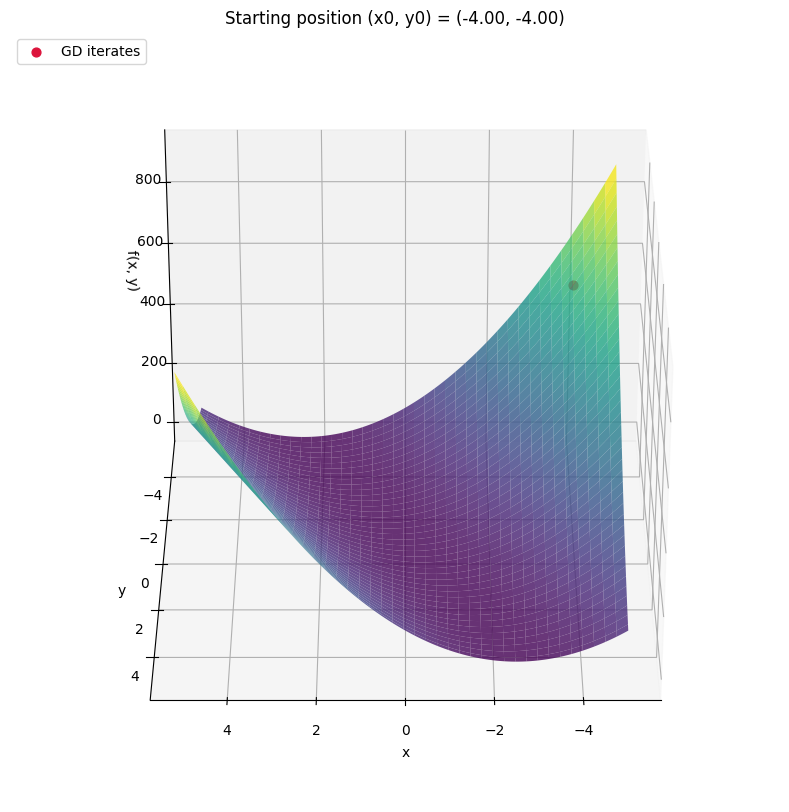

In [5]:

try:
    point_t
except NameError as exc:
    raise RuntimeError('Run the configuration cell before plotting the starting point.') from exc

plot_surface_with_history(points=[point_t], title=f'Starting position (x0, y0) = ({point_t[0]:.2f}, {point_t[1]:.2f})',
                          x_range=(-5, 5), y_range=(-5, 5), azim=90)



## Run a single gradient descent step

Execute the next cell multiple times to follow the sequence $(x_t, y_t)$. Each run
uses the current state, evaluates the gradient, performs

$$(x_{t+1}, y_{t+1}) = (x_t, y_t) - \eta \nabla f(x_t, y_t),$$

and records the new point so you can visualize the entire path afterwards.


Iteration 5
(x_t, y_t) = (0.426752, -1.786624)
f(x_t, y_t) = 3.482852
Gradient = (-24.883200, -12.441600)
History:
   0: (-4.000000, -4.000000)
   1: (-2.080000, -3.040000)
   2: (-0.928000, -2.464000)
   3: (-0.236800, -2.118400)
   4: (0.177920, -1.911040)
   5: (0.426752, -1.786624)


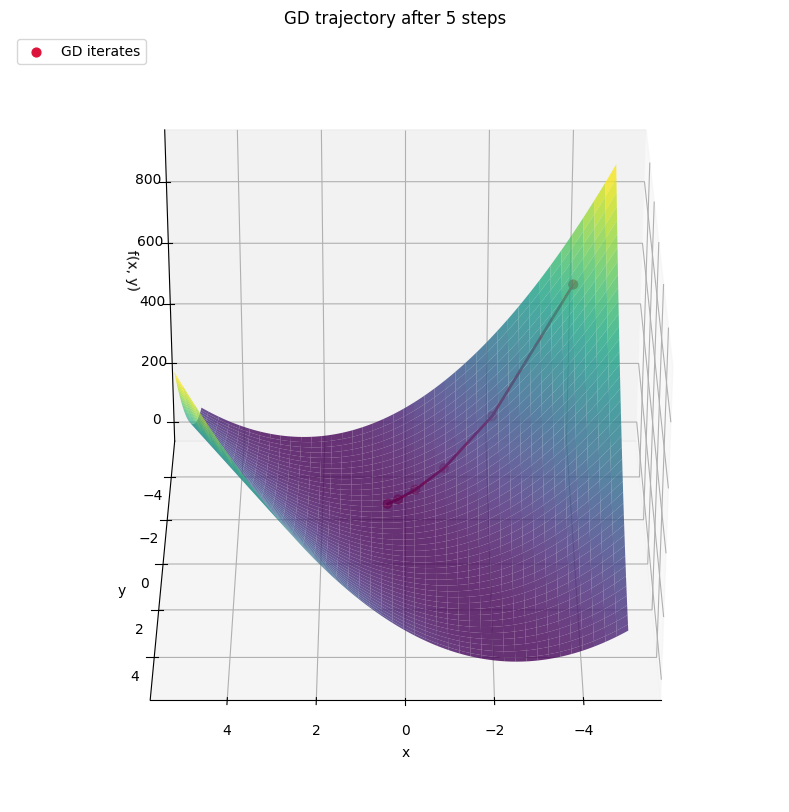

In [10]:

try:
    point_t
    history
    iteration
except NameError as exc:
    raise RuntimeError('Please run the initialization cell before taking steps.') from exc

gradient = grad_f(point_t[0], point_t[1])
point_t = point_t - learning_rate * gradient
iteration += 1
history.append(point_t.copy())

print(f'Iteration {iteration}')
print(f'(x_t, y_t) = ({point_t[0]:.6f}, {point_t[1]:.6f})')
print(f'f(x_t, y_t) = {f(point_t[0], point_t[1]):.6f}')
print(f'Gradient = ({gradient[0]:.6f}, {gradient[1]:.6f})')
print('History:')
for idx, (x_val, y_val) in enumerate(history):
    print(f'  {idx:2d}: ({x_val:.6f}, {y_val:.6f})')

try:
    history
except NameError as exc:
    raise RuntimeError('Take at least one step before drawing the trajectory.') from exc

plot_surface_with_history(points=history, title=f'GD trajectory after {iteration} steps',
                          x_range=(-5, 5), y_range=(-5, 5), azim=90)
